In [181]:
import pandas as pd
df = pd.read_csv('parsed_articles.csv')
df.head()

,num,URL,Title,Post,tags,hubs
0,1,https://habr.com/ru/post/1,Wiki-FAQ для Хабрахабра,Привет! Для сборника ответов на Часто Задаваем...,"['хабрахаб', 'wiki', 'FAQ', 'ЧАВО', 'механизм'...",['Habr']
1,2,https://habr.com/ru/post/2,Мы знаем много недоделок на сайте… но!,"Кроме неработающих и отсутствующих страниц, о ...","['ошибки', 'баги', 'bugs', 'error', 'warning']",['Habr']
2,4,https://habr.com/ru/post/4,"Маслов, Сокур и партнеры пиарят Google в России","Насколько я знаю, Google выбрал агентство «Мас...","['Google', 'Маслов', 'Сокур и партнеры', 'PR',...",['Чулан']
3,6,https://habr.com/ru/post/6,Подкасты на Хабрахабре,Мы планируем добавить в раздел «тексты» возмож...,"['хабрахабр', 'подкасты', 'mp3', 'контент', 'т...",['Habr']
4,7,https://habr.com/ru/post/7,Самопроизвольное разлогинивание,"У меня такое ощущение, что logout время от вре...","['логин', 'login']",['Habr']


In [182]:
df.shape

(2184, 6)

In [183]:
df.describe()

,num
count,2184.000000
mean,1264.420330
std,703.669388
min,1.000000
25%,646.750000
50%,1299.500000
75%,1878.250000
max,2425.000000


In [184]:
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   num     2184 non-null   int64 
 1   URL     2184 non-null   object
 2   Title   2184 non-null   object
 3   Post    2175 non-null   object
 4   tags    2184 non-null   object
 5   hubs    2184 non-null   object
dtypes: int64(1), object(5)
memory usage: 102.5+ KB


In [185]:

from wordcloud import WordCloud, STOPWORDS
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    try:
        for phrase in data:
                for word in phrase.split():
                    corpus.append(word)
            
    except Exception as e:
        print (e)
    return corpus


# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

In [187]:
count=1
corpus = []
for phrase in data:
    phase=str(phrase)
    
    print("{}{}".format(count,phrase))
    print(type(phrase))
    count+=1

1Привет! Для сборника ответов на Часто Задаваемые Вопросы мы решили использовать идею wiki, поскольку, как нам кажется, нет смысла писать одному конкретному человеку FAQ для такого сайта, как Хабрахабр. Все равно останутся люди, у которых останутся вопросы. Посему, обращаюсь к читателям группы со следующим вопросом: какой wiki-движок из доступных, по-вашему, идеально подходит для составления «коллективного» ЧАВО по сайту?
<class 'str'>
2Кроме неработающих и отсутствующих страниц, о которых мы знаем, есть ошибки о которых мы ничего не знаем. Чем они отличаются? Хм… трудный вопрос. Пишите обо всем, а мы разберемся! =) И ничего не забудем. Хабрахабр!
<class 'str'>
3Насколько я знаю, Google выбрал агентство «Маслов, Сокур и партнеры» для pr-сопровождения в России на местном рынке. Недавно они провели неформальную встречу с журналистами, а сегодня в Ведомостях была опубликована статья-страшилка: «Рамблер должен бояться».
<class 'str'>
4Мы планируем добавить в раздел «тексты» возможность пуб

In [188]:
count=1
corpus = []
for phrase in data:
    phase=str(phrase)
    if count==416:
        print("{}{}".format(count,phrase))
        print(type(phrase))
    count+=1

416nan
<class 'float'>


In [189]:
data=df['Post'].values

In [190]:
df.dropna(subset=['Post'], inplace=True)

In [191]:
corpus = get_corpus(data)
procWordCloud = get_wordCloud(corpus)

'float' object has no attribute 'split'


<Axes: >

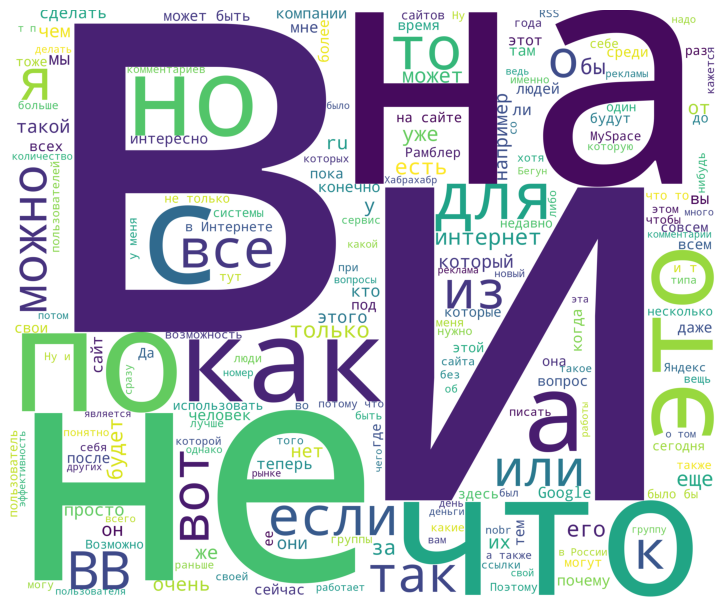

In [192]:
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [193]:
# Количество уникальных слов в тексте
num_words = len(set(corpus))
num_words

7234

In [194]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daniil.nalitov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [195]:
from nltk.corpus import stopwords
from string import punctuation

In [196]:
from ast import literal_eval

In [197]:
russian_stopwords = stopwords.words("russian")

In [198]:

# Удаление знаков пунктуации из текста
def remove_punct(text):
    #table = str.maketrans('', '', string.punctuation)
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)


In [199]:
df['Post_clean'] =df['Post'].map(lambda x: x.lower())

In [200]:
df['Post_clean'] = df['Post_clean'].map(lambda x: remove_punct(x))

In [201]:
df['Post_clean'] =df['Post_clean'].map(lambda x: x.split(' '))

In [202]:
df['Post_clean'] = df['Post_clean'].map(lambda x: [token for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])

In [203]:
df['Post_clean'] = df['Post_clean'].map(lambda x: ' '.join(x))

In [204]:
df.head()

,num,URL,Title,Post,tags,hubs,Post_clean
0,1,https://habr.com/ru/post/1,Wiki-FAQ для Хабрахабра,Привет! Для сборника ответов на Часто Задаваем...,"['хабрахаб', 'wiki', 'FAQ', 'ЧАВО', 'механизм'...",['Habr'],привет сборника ответов часто задаваемые вопро...
1,2,https://habr.com/ru/post/2,Мы знаем много недоделок на сайте… но!,"Кроме неработающих и отсутствующих страниц, о ...","['ошибки', 'баги', 'bugs', 'error', 'warning']",['Habr'],кроме неработающих отсутствующих страниц котор...
2,4,https://habr.com/ru/post/4,"Маслов, Сокур и партнеры пиарят Google в России","Насколько я знаю, Google выбрал агентство «Мас...","['Google', 'Маслов', 'Сокур и партнеры', 'PR',...",['Чулан'],насколько знаю google выбрал агентство «маслов...
3,6,https://habr.com/ru/post/6,Подкасты на Хабрахабре,Мы планируем добавить в раздел «тексты» возмож...,"['хабрахабр', 'подкасты', 'mp3', 'контент', 'т...",['Habr'],планируем добавить раздел «тексты» возможность...
4,7,https://habr.com/ru/post/7,Самопроизвольное разлогинивание,"У меня такое ощущение, что logout время от вре...","['логин', 'login']",['Habr'],такое ощущение logout время времени происходит...


In [205]:
corpus_clean = get_corpus(df['Post_clean'].values)
procWordCloud = get_wordCloud(corpus_clean)

In [206]:

# Количество уникальных слов в тексте
num_words = len(set(corpus_clean))
num_words

45247

<Axes: >

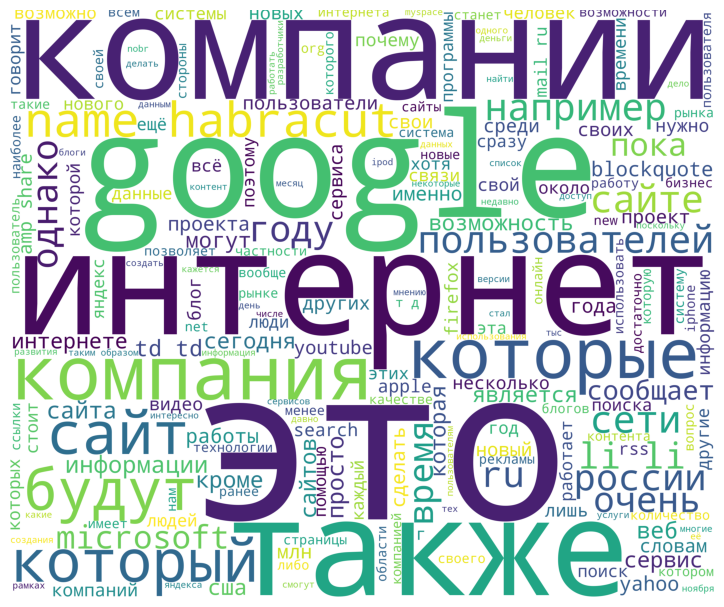

In [207]:

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')

plt.subplot(1, 2, 1)

In [208]:
df_h = df[['Post_clean', 'hubs']]

In [209]:
df_h['hubs'] = df_h['hubs'].map(lambda x: literal_eval(x))

C:\Users\daniil.nalitov\AppData\Local\Temp\ipykernel_22416\3761491427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h['hubs'] = df_h['hubs'].map(lambda x: literal_eval(x))


In [210]:

df_h['hubs'] = df_h['hubs'].map(lambda x: x[0])

C:\Users\daniil.nalitov\AppData\Local\Temp\ipykernel_22416\1287689460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h['hubs'] = df_h['hubs'].map(lambda x: x[0])


In [211]:
df_h.head()

,Post_clean,hubs
0,привет сборника ответов часто задаваемые вопро...,Habr
1,кроме неработающих отсутствующих страниц котор...,Habr
2,насколько знаю google выбрал агентство «маслов...,Чулан
3,планируем добавить раздел «тексты» возможность...,Habr
4,такое ощущение logout время времени происходит...,Habr


In [212]:
df_h['hubs']

0        Habr
1        Habr
2       Чулан
3        Habr
4        Habr
        ...  
2179    Чулан
2180    Чулан
2181    Чулан
2182    Чулан
2183    Чулан
Name: hubs, Length: 2175, dtype: object

In [213]:
p = pd.DataFrame(df_h['hubs'].value_counts())
# p.rename_axis(index=None, columns=None, inplace=True)
a=p.reset_index()

In [214]:
a

,hubs,count
0,Чулан,1420
1,Habr,277
2,IT-компании,214
3,Firefox,21
4,Я пиарюсь,18
5,Дизайн,18
6,Микроформаты,16
7,Поисковые технологии,16
8,Статистика в IT,13
9,Хостинг,13


In [216]:

p = a[a['count'] > 100]
p

,hubs,count
0,Чулан,1420
1,Habr,277
2,IT-компании,214


In [223]:
df_h['hubs'].isin(['IT-компании', 'Habr', 'Чулан'])

0       True
1       True
2       True
3       True
4       True
        ... 
2179    True
2180    True
2181    True
2182    True
2183    True
Name: hubs, Length: 2175, dtype: bool

In [220]:
df

,num,URL,Title,Post,tags,hubs,Post_clean
0,1,https://habr.com/ru/post/1,Wiki-FAQ для Хабрахабра,Привет! Для сборника ответов на Часто Задаваем...,"['хабрахаб', 'wiki', 'FAQ', 'ЧАВО', 'механизм'...",['Habr'],привет сборника ответов часто задаваемые вопро...
1,2,https://habr.com/ru/post/2,Мы знаем много недоделок на сайте… но!,"Кроме неработающих и отсутствующих страниц, о ...","['ошибки', 'баги', 'bugs', 'error', 'warning']",['Habr'],кроме неработающих отсутствующих страниц котор...
2,4,https://habr.com/ru/post/4,"Маслов, Сокур и партнеры пиарят Google в России","Насколько я знаю, Google выбрал агентство «Мас...","['Google', 'Маслов', 'Сокур и партнеры', 'PR',...",['Чулан'],насколько знаю google выбрал агентство «маслов...
3,6,https://habr.com/ru/post/6,Подкасты на Хабрахабре,Мы планируем добавить в раздел «тексты» возмож...,"['хабрахабр', 'подкасты', 'mp3', 'контент', 'т...",['Habr'],планируем добавить раздел «тексты» возможность...
4,7,https://habr.com/ru/post/7,Самопроизвольное разлогинивание,"У меня такое ощущение, что logout время от вре...","['логин', 'login']",['Habr'],такое ощущение logout время времени происходит...
...,...,...,...,...,...,...,...
2179,2421,https://habr.com/ru/post/2421,«Евросеть» опять делает вирусную рекламу,Известная своими вирусными акциями компания «Е...,"['Евросеть', 'видео', 'реклама', 'акция', 'эпа...",['Чулан'],известная своими вирусными акциями компания «е...
2180,2422,https://habr.com/ru/post/2422,Siemens передал данные быстрее всех,Компания Siemens заявила о новом рекорде скоро...,"['Siemens', 'связь', 'передача данных', 'скоро...",['Чулан'],компания siemens заявила новом рекорде скорост...
2181,2423,https://habr.com/ru/post/2423,Google Checkout будет бесплатным до конца 2007...,"Платежная система Google Checkout, в светлое б...","['Google', 'Google Checkout', 'е-деньги', 'эле...",['Чулан'],платежная система google checkout светлое буду...
2182,2424,https://habr.com/ru/post/2424,"Владельцев AllofMP3.com хотят наказать на $1,6...","Сумма компенсации, которую требуют мировые мей...","['AllofMP3.com', 'Mediaservices', 'суд', 'авто...",['Чулан'],сумма компенсации которую требуют мировые мейд...


In [224]:
df_clean = df_h[df_h['hubs'].isin(['IT-компании', 'Habr', 'Чулан'])]

In [225]:

df_clean.head()

,Post_clean,hubs
0,привет сборника ответов часто задаваемые вопро...,Habr
1,кроме неработающих отсутствующих страниц котор...,Habr
2,насколько знаю google выбрал агентство «маслов...,Чулан
3,планируем добавить раздел «тексты» возможность...,Habr
4,такое ощущение logout время времени происходит...,Habr


In [226]:
df_clean.shape

(1911, 2)

In [229]:
from sklearn.model_selection import train_test_split

In [231]:
X_train, X_valid, y_train, y_valid = train_test_split(df_clean['Post_clean'], df_clean['hubs'], test_size=0.1, random_state=42)

In [232]:
X_train.shape

(1719,)

In [233]:

X_valid.shape

(192,)

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [235]:
X_train.shape

(1375,)

In [236]:

X_test.shape

(344,)

In [237]:

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [238]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier(random_state=42))
])

In [239]:
knb_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knb_clf', KNeighborsClassifier(n_neighbors=4))
])

In [240]:
sgd_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('sgd_clf', SGDClassifier(random_state=42))])

In [241]:
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

        Habr       0.56      0.79      0.66        34
 IT-компании       0.18      0.62      0.28        13
       Чулан       0.96      0.81      0.88       297

    accuracy                           0.80       344
   macro avg       0.57      0.74      0.61       344
weighted avg       0.89      0.80      0.83       344



In [242]:
parameters = { 
              'sgd_clf__loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'sgd_clf__class_weight':[None, 'balanced'],
              'sgd_clf__penalty':[None, 'l2', 'l1', 'elasticnet'],
              'tfidf__strip_accents':['ascii', 'unicode', None],
               'tfidf__ngram_range':[(1,2), (1,3), (1,4)]
              }
model = GridSearchCV(sgd_ppl_clf, parameters, cv=4, n_jobs=-1).fit(X_train, y_train)

c:\Users\daniil.nalitov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
288 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\daniil.nalitov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\daniil.nalitov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [243]:
print('Best score and parameter combination:')
print(model.best_score_, model.best_params_) 
     

Best score and parameter combination:
0.8429067224896603 {'sgd_clf__class_weight': None, 'sgd_clf__loss': 'hinge', 'sgd_clf__penalty': None, 'tfidf__ngram_range': (1, 2), 'tfidf__strip_accents': 'unicode'}


In [244]:

print('Best score and parameter combination:')
print(model.best_score_, model.best_params_) 

Best score and parameter combination:
0.8429067224896603 {'sgd_clf__class_weight': None, 'sgd_clf__loss': 'hinge', 'sgd_clf__penalty': None, 'tfidf__ngram_range': (1, 2), 'tfidf__strip_accents': 'unicode'}


In [245]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 4), strip_accents='unicode')),
    ('sgd_clf', SGDClassifier(penalty='elasticnet', class_weight='balanced', random_state=42))
])

In [246]:
sgd_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 4), strip_accents='unicode')),
                ('sgd_clf',
                 SGDClassifier(class_weight='balanced', penalty='elasticnet',
                               random_state=42))])

In [247]:
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

        Habr       0.67      0.76      0.71        42
 IT-компании       0.25      0.58      0.35        19
       Чулан       0.94      0.83      0.88       283

    accuracy                           0.81       344
   macro avg       0.62      0.72      0.65       344
weighted avg       0.87      0.81      0.83       344



In [248]:
knb_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('knb_clf', KNeighborsClassifier(n_neighbors=4))])

In [249]:
predicted_sgd = knb_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

        Habr       0.46      0.67      0.54        33
 IT-компании       0.52      0.32      0.40        71
       Чулан       0.79      0.82      0.80       240

    accuracy                           0.71       344
   macro avg       0.59      0.61      0.58       344
weighted avg       0.70      0.71      0.70       344



In [250]:
predicted_sgd_val = sgd_ppl_clf.predict(X_valid)
print(metrics.classification_report(predicted_sgd_val, y_valid))

              precision    recall  f1-score   support

        Habr       0.73      0.59      0.65        27
 IT-компании       0.38      0.53      0.44        15
       Чулан       0.90      0.89      0.90       150

    accuracy                           0.82       192
   macro avg       0.67      0.67      0.66       192
weighted avg       0.83      0.82      0.83       192

